Задача 1. Реализовать примеры нечёткого вывода Мамдани и Сугено из учебника

# Нечеткий логический вывод Мамдани, пример 1

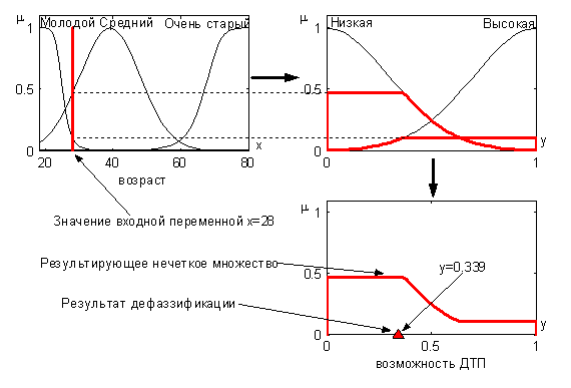

In [76]:
import matplotlib.pyplot as plt
import numpy as np

In [77]:
class age:
  def young(x):
    sigma = 1 / np.sqrt(2*np.pi)
    alpha = 12
    return (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp((-(x+10-alpha)**2)/(2*alpha**2))
  def middle(x):
    sigma = 1 / np.sqrt(2*np.pi)
    alpha = 17
    return (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp((-(x-30-alpha)**2)/(2*alpha**2))
  def old(x):
    sigma = 1 / np.sqrt(2*np.pi)
    alpha = 20
    return (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp((-(x-80-alpha)**2)/(2*alpha**2))

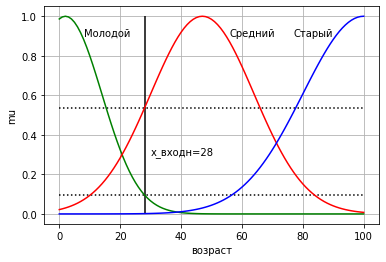

In [78]:
m_young = [age.young(i) for i in range(0, 101)]
m_middle = [age.middle(i) for i in range(0, 101)]
m_old = [age.old(i) for i in range(0, 101)]

plt.plot(m_young, 'g')
plt.plot(m_middle, 'r')
plt.plot(m_old, 'b')

plt.grid()

plt.text(8, 0.9, 'Молодой')
plt.text(56, 0.9, 'Средний')
plt.text(77, 0.9, 'Старый')

plt.ylabel('mu')
plt.xlabel('возраст')

plt.vlines(28, 0, 1, color='black')
plt.hlines(m_middle[28], 0, 100, linestyle=':', color='black')
plt.hlines(m_young[28], 0, 100, linestyle=':', color='black')

plt.text(30, 0.3, 'x_входн=28')

plt.show()

In [79]:
print('Полученные уровни:')
print(m_middle[28])
print(m_young[28])
alpha1 = m_middle[28]
alpha2 = m_young[28]

Полученные уровни:
0.5354929930529173
0.0956344448325386


In [80]:
class probability:
  def low(x):
    sigma = 1 / np.sqrt(2*np.pi)
    alpha = 0.3
    return (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp((-(x+0.3-alpha)**2)/(2*alpha**2))
  def high(x):
    sigma = 1 / np.sqrt(2*np.pi)
    alpha = 0.3
    return (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp((-(x-0.7-alpha)**2)/(2*alpha**2))

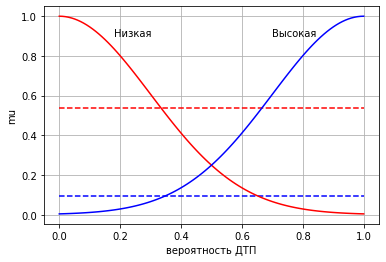

In [81]:
m_low = [probability.low(i) for i in np.linspace(0, 1, 101)]
m_high = [probability.high(i) for i in np.linspace(0, 1, 101)]

plt.plot(np.linspace(0, 1, 101), m_low, 'r')
plt.plot(np.linspace(0, 1, 101), m_high, 'b')

plt.grid()

plt.ylabel('mu')
plt.xlabel('вероятность ДТП')

plt.text(0.18, 0.9, 'Низкая')
plt.text(0.7, 0.9, 'Высокая')

plt.hlines(alpha1, 0, 1, linestyle="--", color='red')
plt.hlines(alpha2, 0, 1, linestyle="--", color='blue')

plt.show()

In [82]:
pip install scikit-fuzzy

In [83]:
import skfuzzy as f

In [84]:
m_new_low = f.fuzzy_and(np.linspace(0, 1, 101), m_low, np.linspace(0, 1, 101), [alpha1] * 101)[1]
m_new_high = f.fuzzy_and(np.linspace(0, 1, 101), m_high, np.linspace(0, 1, 101), [alpha2] * 101)[1]

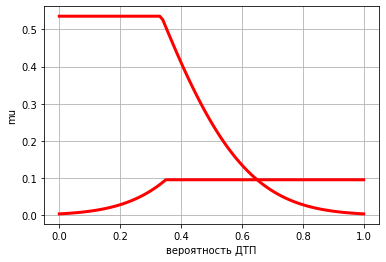

In [85]:
axis_01 = np.linspace(0, 1, 101)
plt.plot(axis_01, m_new_low, 'r', linewidth=3)
plt.plot(axis_01, m_new_high, 'r', linewidth=3)
plt.ylabel('mu')
plt.xlabel('вероятность ДТП')
plt.grid()
plt.show()

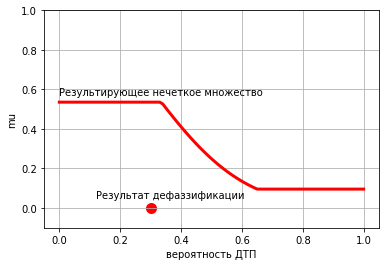

In [86]:
m_result = f.fuzzy_or(axis_01, m_new_low, axis_01, m_new_high)[1]
plt.plot(axis_01, m_result, 'r', linewidth=3)
plt.ylabel('mu')
plt.xlabel('вероятность ДТП')
plt.ylim(-0.1, 1)
plt.grid()
defuzyfication = np.trapz(m_result, axis_01) #интеграл
plt.scatter(defuzyfication, 0, color='red', linewidth=5)
plt.text(0.12, 0.05, 'Результат дефаззификации')
plt.text(0, 0.57, 'Результирующее нечеткое множество')
plt.show()

In [87]:
defuzyfication

0.30078439105356414

# Нечеткий логический вывод Мамдани, пример 2

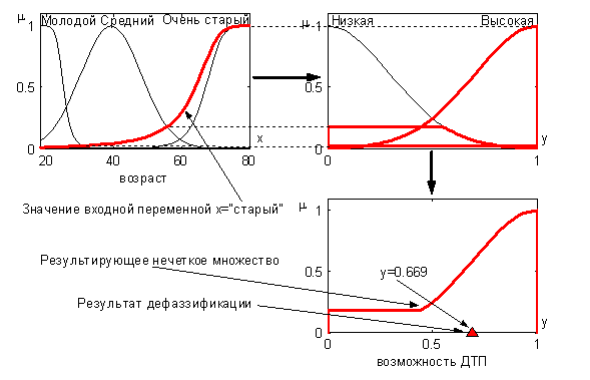

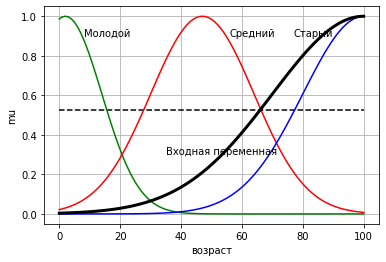

In [88]:
def input_rule(x):
  sigma = 1 / np.sqrt(2*np.pi)
  alpha = 30
  return (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp((-(x-70-alpha)**2)/(2*alpha**2))

m_young = [age.young(i) for i in range(0, 101)]
m_middle = [age.middle(i) for i in range(0, 101)]
m_old = [age.old(i) for i in range(0, 101)]

rule = [input_rule(i) for i in range(0, 101)]

plt.plot(m_young, 'g')
plt.plot(m_middle, 'r')
plt.plot(m_old, 'b')
plt.plot(rule, color='black', linewidth=3)

plt.grid()

plt.text(8, 0.9, 'Молодой')
plt.text(56, 0.9, 'Средний')
plt.text(77, 0.9, 'Старый')
plt.text(35, 0.3, 'Входная переменная')

plt.ylabel('mu')
plt.xlabel('возраст')

dif = 1000
for i in range(0, 101):
  if abs(m_middle[i] - rule[i]) <= dif:
    dif = abs(m_middle[i] - rule[i])
    point = i

plt.hlines(rule[point], 0, 100, linestyle='--')
plt.show()

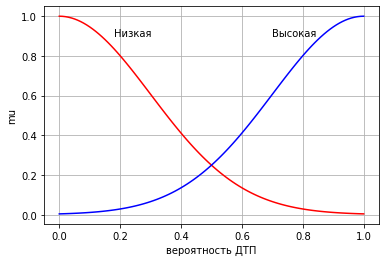

In [89]:
m_low = [probability.low(i) for i in np.linspace(0, 1, 101)]
m_high = [probability.high(i) for i in np.linspace(0, 1, 101)]

plt.plot(np.linspace(0, 1, 101), m_low, 'r')
plt.plot(np.linspace(0, 1, 101), m_high, 'b')

plt.grid()

plt.ylabel('mu')
plt.xlabel('вероятность ДТП')

plt.text(0.18, 0.9, 'Низкая')
plt.text(0.7, 0.9, 'Высокая')

plt.show()

In [90]:
m_new_low2 = f.fuzzy_and(np.linspace(0, 1, 101), m_low, np.linspace(0, 1, 101), [rule[point]] * 101)[1]
m_new_high2 = m_high

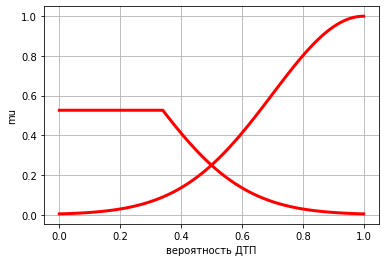

In [91]:
plt.plot(axis_01, m_new_low2, 'r', linewidth=3)
plt.plot(axis_01, m_new_high2, 'r', linewidth=3)
plt.ylabel('mu')
plt.xlabel('вероятность ДТП')
plt.grid()
plt.show()

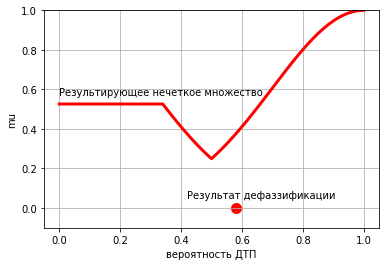

In [92]:
m_result2 = f.fuzzy_or(axis_01, m_new_low2,axis_01, m_new_high2)[1]
plt.plot(axis_01, m_result2, 'r', linewidth=3)
plt.ylim(-0.1, 1)
plt.text(0, 0.57, 'Результирующее нечеткое множество')
plt.grid()
plt.ylabel('mu')
plt.xlabel('вероятность ДТП')
defuzyfication2 = np.trapz(m_result2, axis_01) #интеграл
plt.scatter(defuzyfication2, 0, color='red', linewidth=5)
plt.text(0.42, 0.05, 'Результат дефаззификации')
plt.show()

In [93]:
defuzyfication2

0.5796520512567743

# Выполнение нечеткого логического вывода Сугено.

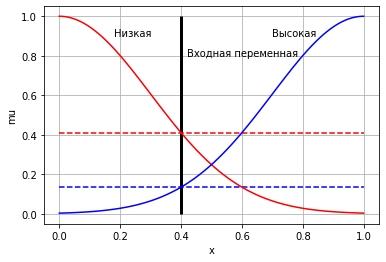

In [94]:
m_low = [probability.low(i) for i in np.linspace(0, 1, 101)]
m_high = [probability.high(i) for i in np.linspace(0, 1, 101)]

plt.plot(np.linspace(0, 1, 101), m_low, 'r')
plt.plot(np.linspace(0, 1, 101), m_high, 'b')

plt.grid()

plt.ylabel('mu')
plt.xlabel('x')

plt.text(0.18, 0.9, 'Низкая')
plt.text(0.7, 0.9, 'Высокая')
plt.text(0.42, 0.8, 'Входная переменная')

plt.vlines(0.4, 0, 1, color='black', linewidth=3)
plt.hlines(probability.low(0.4), 0, 1, linestyle='--', color='red')
plt.hlines(probability.high(0.4), 0, 1, linestyle='--', color='blue')

plt.show()

In [95]:
print('Уровни:')
print(probability.low(0.4))
print(probability.high(0.4))
gamma1 = probability.low(0.4)
gamma2 = probability.high(0.4)

Уровни:
0.41111229050718745
0.1353352832366128


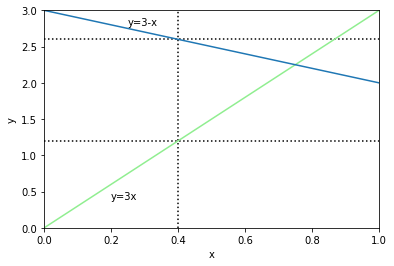

In [96]:
def y1(x):
  return 3 * x
def y2(x):
  return 3 - x

line1 = [y1(i) for i in range(0, 4)]
line2 = [y2(i) for i in range(0, 4)]

plt.plot(range(0, 4), line1, color='lightgreen')
plt.plot(range(0, 4), line2)

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('x')
plt.ylabel('y')

plt.text(0.25, 2.8, 'y=3-x')
plt.text(0.2, 0.4, 'y=3x')

plt.vlines(0.4, 0, 3, linestyle=':')
plt.hlines(y1(0.4), 0, 1, linestyle=':')
plt.hlines(y2(0.4), 0, 1, linestyle=':')

beta1 = y1(0.4)
beta2 = y2(0.4)

plt.show()

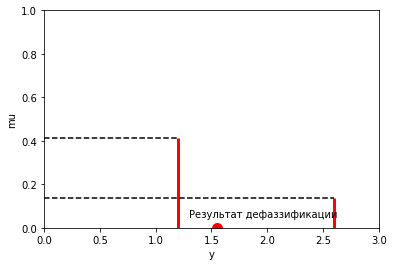

In [113]:
plt.vlines(beta1, 0, gamma1, color='red', linewidth=3)
plt.vlines(beta2, 0, gamma2, color='red', linewidth=3)
plt.hlines(gamma1, 0, beta1, linestyle='--')
plt.hlines(gamma2, 0, beta2, linestyle='--')
plt.xlim(0, 3)
plt.ylim(0, 1)
defaz = (beta1 * gamma1 + beta2 * gamma2) / (gamma1 + gamma2) #среднее взвешенное
plt.scatter(defaz, 0, linewidth=5, color='red')
plt.text(1.3, 0.05, 'Результат дефаззификации')
plt.xlabel('y')
plt.ylabel('mu')
plt.show()

In [98]:
defaz

1.5467293215947007

Задача 2. Реализовать применение алгоритмов нечёткого вывода Мамдани и Сугено для своего варианта (из Липатовой с.58), при необходимости дополнить базу знаний.

In [99]:
class price:
  def low(x):
    if 0 <= x <= 5:
      return 1
    if 5 <= x <= 10:
      return -0.2 * x + 2
    if 10 <= x:
      return 0
  def normal(x):
    if 0 <= x <= 5:
      return 0
    if 5 <= x <= 10:
      return 0.2 * x - 1
    if 10 <= x <= 15:
      return -0.2 * x + 3
    if 15 <= x:
      return 0
  def high(x):
    if 0 <= x <= 10:
      return 0
    if 10 <= x <= 15:
      return 0.2 * x - 2
    if 15 <= x:
      return 1

In [100]:
class quality:
  def low(x):
    if 0 <= x <= 2:
      return 1
    if 2 <= x <= 3:
      return -x + 3
    if 3 <= x:
      return 0
  def normal(x):
    if 0 <= x <= 2:
      return 0
    if 2 <= x <= 3:
      return x - 2
    if 3 <= x <= 4:
      return 1
    if 4 <= x:
      return -x + 5
  def high(x):
    if 0 <= x <= 3:
      return 0
    if 3 <= x <= 4:
      return x - 3
    if 4 <= x:
      return 1

In [101]:
import matplotlib.pyplot as plt

## Вывод Мамдани

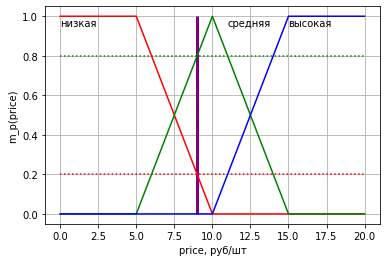

In [102]:
price_low = [price.low(i) for i in range(21)]
price_normal = [price.normal(i) for i in range(21)]
price_high = [price.high(i) for i in range(21)]

plt.plot(range(21), price_low, 'r')
plt.plot(range(21), price_normal, 'g')
plt.plot(range(21), price_high, 'b')

plt.ylabel("m_p(price)")
plt.xlabel("price, руб/шт")

plt.text(0, 0.95, 'низкая')
plt.text(11, 0.95, 'средняя')
plt.text(15, 0.95, 'высокая')

plt.vlines(9, 0, 1, color='purple', linewidth=3)
plt.hlines(price.low(9), 0, 20, linestyle=':', color='red')
plt.hlines(price.normal(9), 0, 20, linestyle=':', color='green')

epsilon1 = price.low(9)
epsilon2 = price.normal(9)

plt.grid()

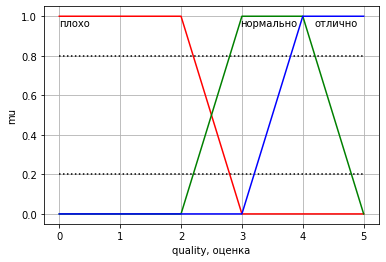

In [103]:
quality_low = [quality.low(i) for i in np.linspace(0, 5, 11)]
quality_normal = [quality.normal(i) for i in np.linspace(0, 5, 11)]
quality_high = [quality.high(i) for i in np.linspace(0, 5, 11)]

plt.plot(np.linspace(0, 5, 11), quality_low, 'r')
plt.plot(np.linspace(0, 5, 11), quality_normal, 'g')
plt.plot(np.linspace(0, 5, 11), quality_high, 'b')

plt.ylabel("mu")
plt.xlabel("quality, оценка")

plt.text(0, 0.95, 'плохо')
plt.text(2.97, 0.95, 'нормально')
plt.text(4.2, 0.95, 'отлично')

plt.hlines(epsilon1, 0, 5, linestyle=':')
plt.hlines(epsilon2, 0, 5, linestyle=':')

plt.grid()

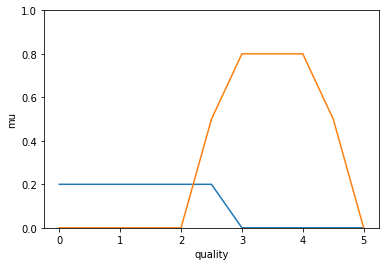

In [104]:
new_quality_low = f.fuzzy_and(np.linspace(0, 5, 11), quality_low, np.linspace(0, 5, 11), [epsilon1] * 11)[1]
new_quality_normal = f.fuzzy_and(np.linspace(0, 5, 11), quality_normal, np.linspace(0, 5, 11), [epsilon2] * 11)[1]

plt.plot(np.linspace(0, 5, 11), new_quality_low)
plt.plot(np.linspace(0, 5, 11), new_quality_normal)
plt.ylim(0, 1)
plt.ylabel('mu')
plt.xlabel('quality')
plt.show()

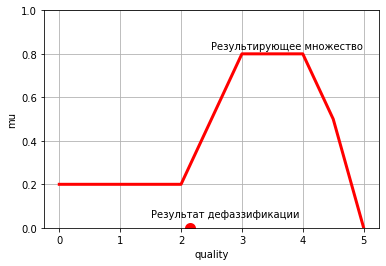

In [105]:
result_mamdani = f.fuzzy_or(np.linspace(0, 5, 11), new_quality_low, np.linspace(0, 5, 11), new_quality_normal)[1]
plt.plot(np.linspace(0, 5, 11), result_mamdani, color='red', linewidth=3)
plt.grid()
plt.ylim(0, 1)
plt.ylabel('mu')
plt.xlabel('quality')
defaz1 = np.trapz(result_mamdani, np.linspace(0, 5, 11))
plt.scatter(defaz1, 0, linewidth=5, color='red')
plt.text(2.5, 0.82, 'Результирующее множество')
plt.text(1.5, 0.05, 'Результат дефаззификации')
plt.show()

In [106]:
defaz1

2.15

## Вывод Сугено

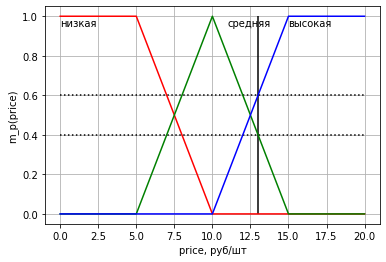

In [107]:
price_low = [price.low(i) for i in range(21)]
price_normal = [price.normal(i) for i in range(21)]
price_high = [price.high(i) for i in range(21)]

plt.plot(range(21), price_low, 'r')
plt.plot(range(21), price_normal, 'g')
plt.plot(range(21), price_high, 'b')

plt.ylabel("m_p(price)")
plt.xlabel("price, руб/шт")

plt.text(0, 0.95, 'низкая')
plt.text(11, 0.95, 'средняя')
plt.text(15, 0.95, 'высокая')

plt.vlines(13, 0, 1)
plt.hlines(price_normal[12], 0, 20, linestyle=':')
plt.hlines(price_high[12], 0, 20, linestyle=':')

sigma1 = price_normal[12]
sigma2 = price_high[12]

plt.grid()

Дополнение к базе знаний:

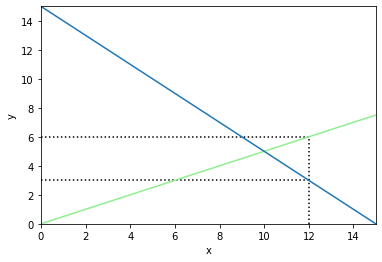

In [118]:
def y11(x):
  return x / 2
def y22(x):
  return 15 - x

line1 = [y11(i) for i in range(0, 16)]
line2 = [y22(i) for i in range(0, 16)]

plt.plot(range(0, 16), line1, color='lightgreen')
plt.plot(range(0, 16), line2)

plt.xlim(0, 15)
plt.ylim(0, 15)

plt.xlabel('x')
plt.ylabel('y')

plt.vlines(12, 0, 6, linestyle=':')
plt.hlines(y11(12), 0, 12, linestyle=':')
plt.hlines(y22(12), 0, 12, linestyle=':')

plt.show()

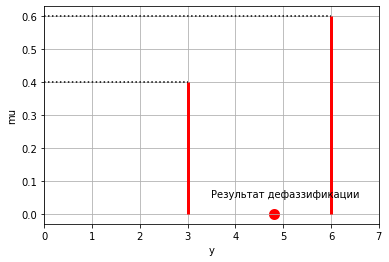

In [121]:
plt.vlines(y11(12), 0, sigma1, color='red', linewidth=3)
plt.vlines(y22(12), 0, sigma2, color='red', linewidth=3)
defaz2 = (3 * 0.4 + 6 * 0.6) / (0.4 + 0.6)
plt.xlim(0, 7)
plt.scatter(defaz2, 0, linewidth=5, color='red')
plt.text(3.5, 0.05, 'Результат дефаззификации')
plt.hlines(sigma1, 0, y11(12), linestyle=':')
plt.hlines(sigma2, 0, y22(12), linestyle=':')
plt.xlabel('y')
plt.ylabel('mu')
plt.grid()
plt.show()

In [122]:
defaz2

4.8